In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Ideal, but there's a workaround below if you don't have this package 
# (https://github.com/lsst-pst/syseng_throughputs) 
# Does require LSST simulations stack
import lsst.syseng.throughputs as st

In [3]:
def calcAstrometricError(mag, m5, fwhm_eff, error_sys=10.0):
    """
    Calculate the astrometric error, for object catalog purposes.
    fwhm_eff (in same units as returned astrometric error)
    error_sys is the systematic error expected as the minimum value for astrometric error.
    Returns astrometric error for a given SNR (in same units as fwhm_eff).
    """
    rgamma = 0.039
    xval = np.power(10, 0.4*(mag-m5))
    # The average FWHMeff is 0.7" (or 700 mas).
    error_rand = fwhm_eff * np.sqrt((0.04-rgamma)*xval + rgamma*xval*xval)
    astrom_error = np.sqrt(error_sys * error_sys + error_rand*error_rand)
    return astrom_error

In [4]:
# Pull up the throughput curves and calculate m5
defaultDirs = st.setDefaultDirs()
hardware, system = st.buildHardwareAndSystem(defaultDirs)
m5 = st.makeM5(hardware, system, exptime=15, nexp=2, X=1.0)

In [5]:
m5[['FWHMeff', 'm5']]

,FWHMeff,m5
u,0.92,23.681847
g,0.87,24.805485
r,0.83,24.366544
i,0.80,23.947028
z,0.78,23.375466
y,0.76,22.467668


In [6]:
# Convenience for someone running this later, without lsst packages: (cut and paste)
m5_lim = m5.m5.to_dict()
FWHMeff = m5.FWHMeff.to_dict()
print('m5_lim')
print(m5_lim)
print('FWHMeff')
print(FWHMeff)

m5_lim
{'u': 23.681847096372046, 'g': 24.805485162309864, 'r': 24.366544272782974, 'i': 23.94702848604054, 'z': 23.37546595033629, 'y': 22.46766827505174}
FWHMeff
{'u': 0.92, 'g': 0.87, 'r': 0.83, 'i': 0.8, 'z': 0.78, 'y': 0.76}


In [7]:
# Calculate astrometric error assuming NO systematic noise - just shot noise
mags = np.arange(17, 26, 0.5)
filterlist = ('u', 'g', 'r', 'i', 'z', 'y')
astrom_err = {}
for f in filterlist:
    astrom_err[f] = np.zeros(len(mags))
    for i, mag in enumerate(mags):
        astrom_err[f][i] = calcAstrometricError(mag, m5_lim[f], FWHMeff[f]*1000, error_sys=0)

In [8]:
pd.DataFrame(astrom_err, index=mags)

,u,g,r,i,z,y
17.0,1.395416,0.766870,0.901863,1.064974,1.379232,2.169422
17.5,1.795605,0.973472,1.149317,1.364410,1.785911,2.888159
18.0,2.336009,1.241401,1.474289,1.763919,2.343815,3.928951
18.5,3.085467,1.593987,1.909384,2.309881,3.131772,5.480202
19.0,4.156599,2.067351,2.506562,3.077632,4.279170,7.847456
19.5,5.734208,2.719248,3.350445,4.190794,5.997584,11.520772
20.0,8.119393,3.643898,4.579939,5.851729,8.629411,17.279860
20.5,11.797294,4.995973,6.422145,8.388465,12.722838,26.360416
21.0,17.542054,7.028081,9.244515,12.326907,19.149173,40.718708
21.5,26.582057,10.148372,13.635247,18.503595,29.288785,63.452197


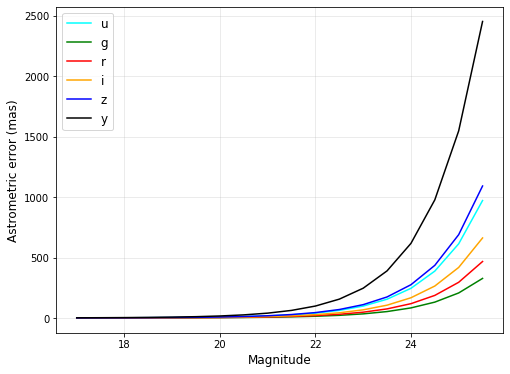

In [9]:
plt.figure(figsize=(8,6))
colors = {'u': 'cyan', 'g': 'g', 'r':'r', 'i':'orange', 'z': 'b', 'y': 'k'}
for f in filterlist:
    plt.plot(mags, astrom_err[f], color=colors[f], label=f)
plt.legend(loc='upper left', fontsize='large', fancybox=True, numpoints=1)
plt.xlabel('Magnitude', fontsize='large')
plt.ylabel('Astrometric error (mas)', fontsize='large')
plt.grid(True, alpha=0.3)

(0, 50)

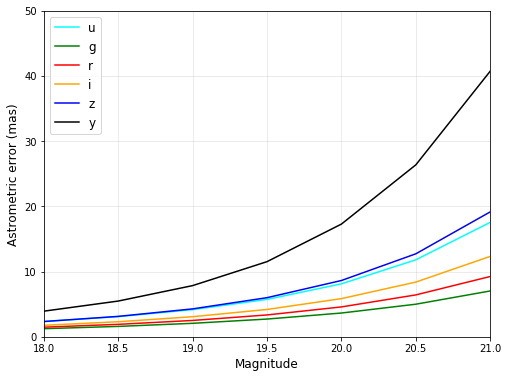

In [10]:
plt.figure(figsize=(8,6))
colors = {'u': 'cyan', 'g': 'g', 'r':'r', 'i':'orange', 'z': 'b', 'y': 'k'}
for f in filterlist:
    plt.plot(mags, astrom_err[f], color=colors[f], label=f)
plt.legend(loc='upper left', fontsize='large', fancybox=True, numpoints=1)
plt.xlabel('Magnitude', fontsize='large')
plt.ylabel('Astrometric error (mas)', fontsize='large')
plt.grid(True, alpha=0.3)
plt.xlim(18, 21)
plt.ylim(0, 50)